In [1]:
from company_data import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil

C:\Users\rosta\AppData\Local\Temp\ipykernel_1028\295005340.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set name of company and symbol, input excel data and load income statement and balance sheet table
company = data['Company_name'][0]
symbol = data['Symbol'][0]
file_path = f'C:\\Users\\rosta\\Python\\Projects\\Financial_analysis\\{symbol}\\'
shutil.rmtree(file_path)
os.makedirs(file_path)

file = pd.read_excel('stocks.xlsx', sheet_name=symbol)

income_statement_table = file.head(8)

table = file.loc[10:17]
balance_sheet_table = pd.DataFrame(table) 
balance_sheet_table.rename(columns={'Income Statement':'Balance Sheet'},inplace=True)


In [3]:
# Define values for figures
columns = np.arange(2014,2024)
plot_color = '#1d2a6e'
grid_color = '#555'
bar1_color = '#1829b5'
bar2_color = '#53a6ff'
bar3_color = '#5367d1'
bar4_color = '#8996df'


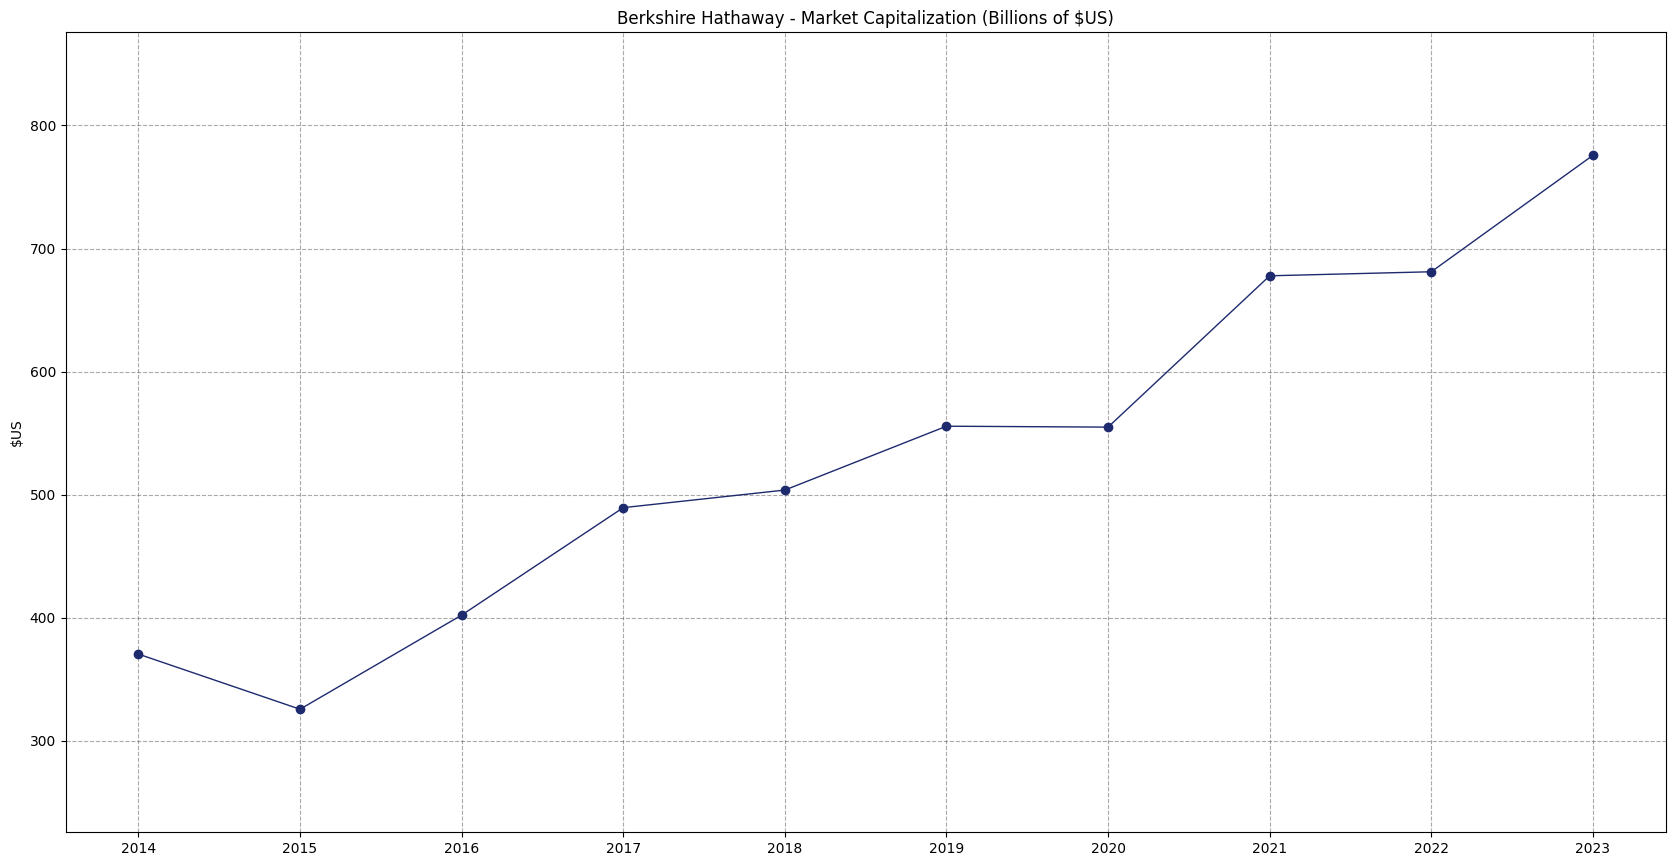

In [4]:
# Calculate the market capitalization
shares = income_statement_table.loc[5, columns]
price = income_statement_table.loc[7, columns]
market_cap = (price * shares)/1000

# Create a figure to visualize the market capitalization
fig0 = plt.figure(figsize=(16,8),dpi=100)
axes = fig0.add_axes([1,1,1,1])

axes.plot(market_cap,color=plot_color,linewidth=1,linestyle='-',marker='o')
axes.set(xticks=columns,ylabel='$US',ylim=(min(market_cap)-100,max(market_cap)+100),title=f'{company} - Market Capitalization (Billions of $US)')
axes.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}1.jpg',format='jpg',bbox_inches='tight')

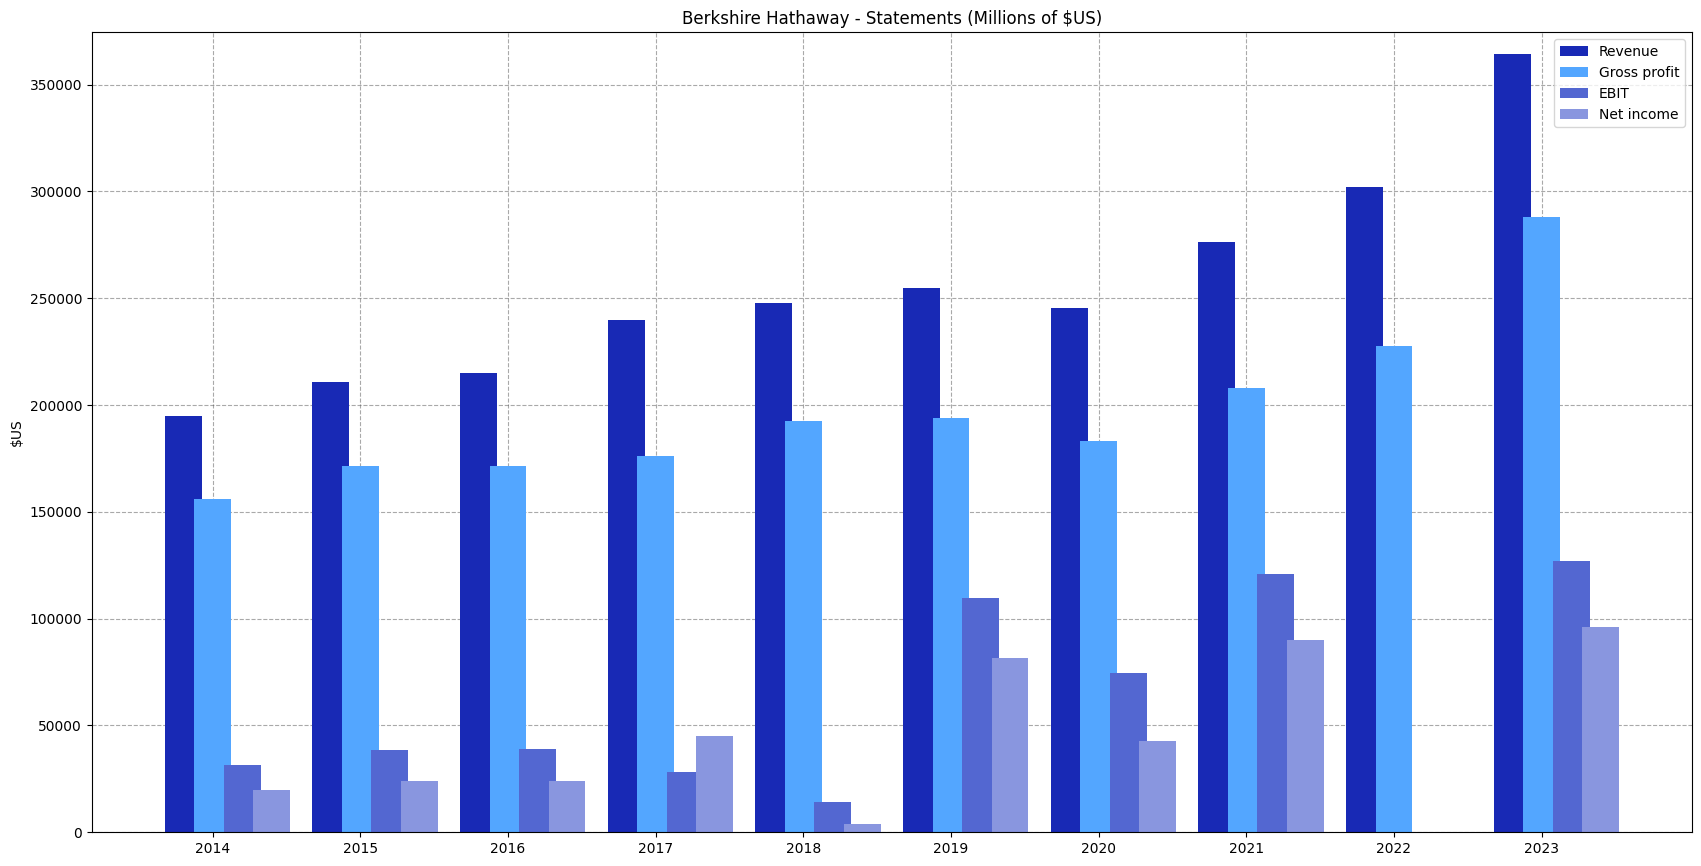

In [5]:
# Select data for revenue, gross profit, ebit and net income
revenue = income_statement_table.loc[1,columns]
gross_profit = income_statement_table.loc[2,columns]
ebit = income_statement_table.loc[3, columns]
net_income = income_statement_table.loc[4, columns]

# Create a figure to visualize the revenue, ebit and net income
fig1 = plt.figure(figsize=(16,8),dpi=100)
axes1 = fig1.add_axes([1,1,1,1])

axes1.bar(columns-0.2,revenue,width=0.25,color=bar1_color,zorder=2,label='Revenue')
axes1.bar(columns,gross_profit,width=0.25,color=bar2_color,zorder=2,label='Gross profit')
axes1.bar(columns+0.2,ebit,width=0.25,color=bar3_color,zorder=2,label='EBIT')
axes1.bar(columns+0.4,net_income,width=0.25,color=bar4_color,zorder=2,label='Net income')
axes1.set(title=f'{company} - Statements (Millions of $US)',xticks=columns,ylabel='$US',ylim=(0,max(revenue)+10000),alpha=1)
axes1.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
axes1.legend()
plt.savefig(f'{file_path}2.jpg',format='jpg',bbox_inches='tight')

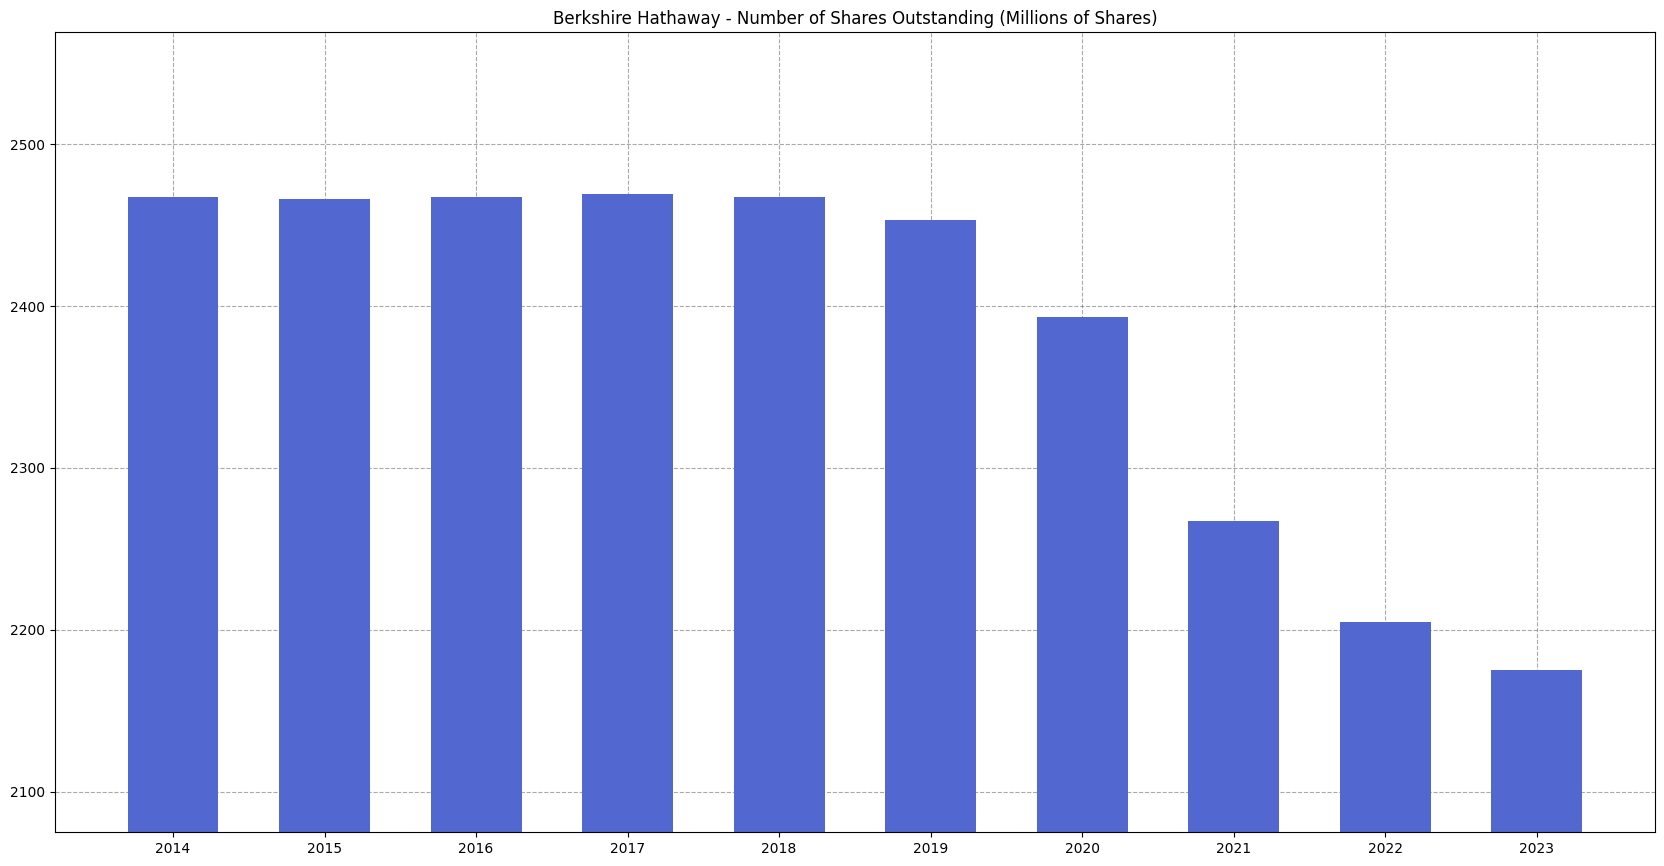

In [6]:
# Select data for number of shares outstanding
shares = income_statement_table.loc[5, columns]

# Create a figure to visualize the number of shares
fig = plt.figure(figsize=(16,8),dpi=100)

axes = fig.add_axes([1,1,1,1])

axes.bar(columns,shares,width=0.6,color=bar3_color,zorder=2)
axes.set(title=f'{company} - Number of Shares Outstanding (Millions of Shares)',xticks=columns,ylim=(min(shares)-100,max(shares)+100),)
axes.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}3.jpg',format='jpg',bbox_inches='tight')

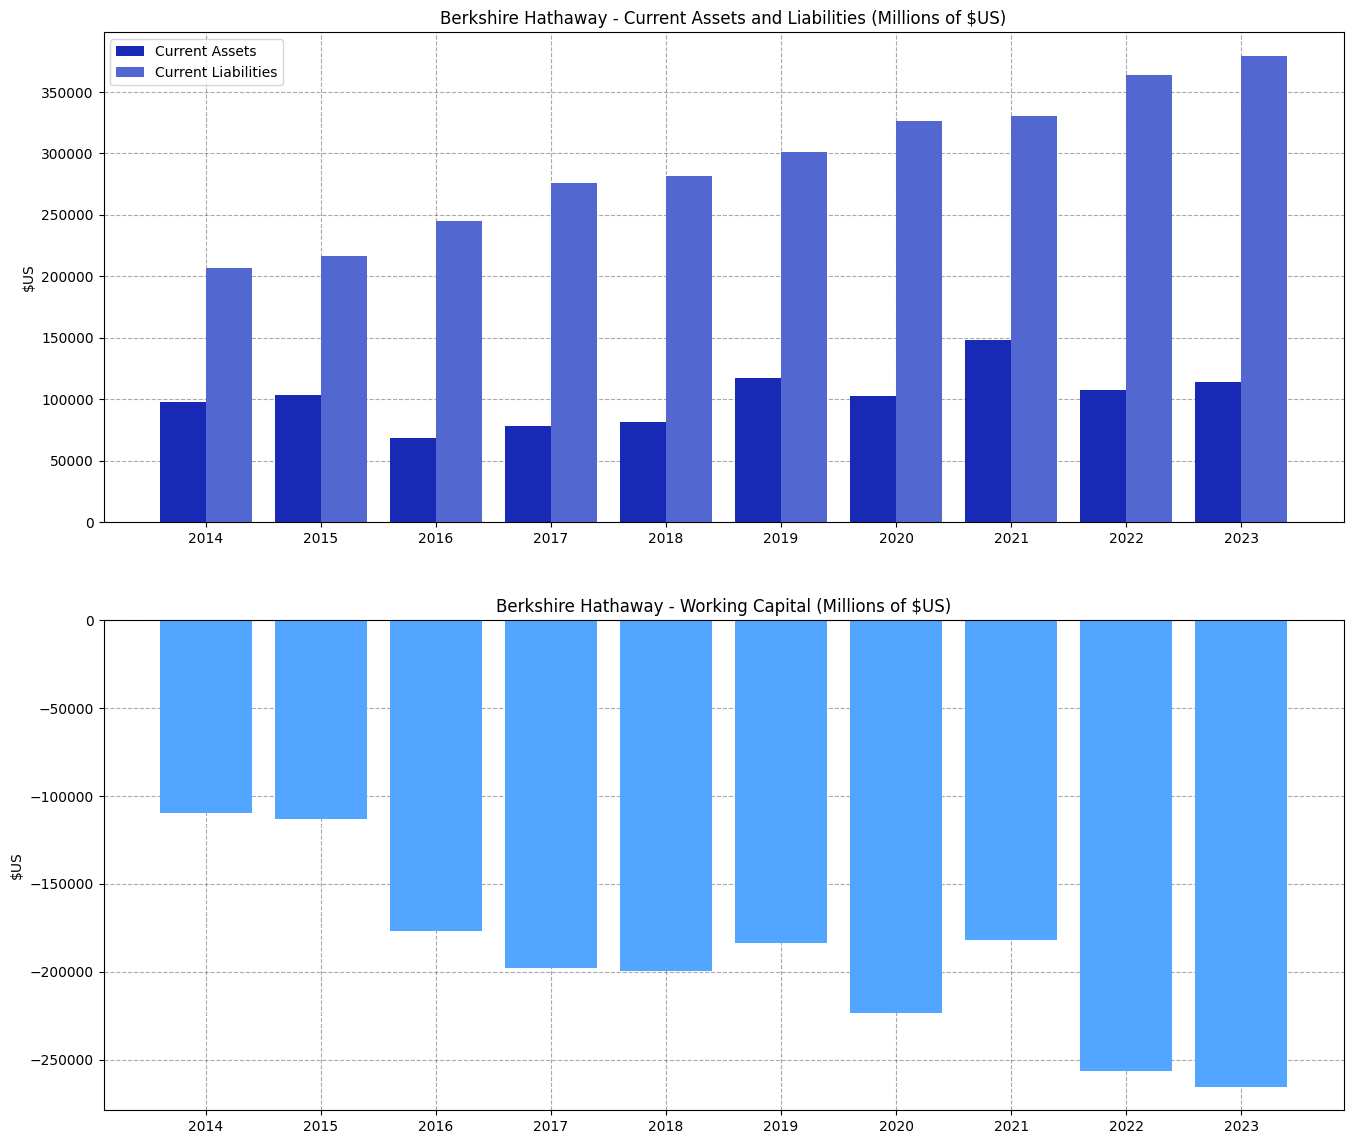

In [7]:
# Select data and calculate working capital
current_assets = balance_sheet_table.loc[11, columns]
current_liabilities = balance_sheet_table.loc[12, columns]
working_capital = current_assets - current_liabilities

# Create a figure to visualize current assets and liabilities with working capital subplots
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,14),dpi=100)

axes[0].bar(columns-0.2,current_assets,width=0.4,color=bar1_color,zorder=2,label='Current Assets')
axes[0].bar(columns+0.2,current_liabilities,width=0.4,color=bar3_color,zorder=2,label='Current Liabilities')
axes[0].set(xticks=columns,ylabel='$US',title=f'{company} - Current Assets and Liabilities (Millions of $US)')
axes[0].legend()

axes[1].bar(columns,working_capital,color=bar2_color,zorder=2)
axes[1].set(xticks=columns,ylabel='$US',title=f'{company} - Working Capital (Millions of $US)')

for ax in axes:
    ax.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}5.jpg',format='jpg',bbox_inches='tight')

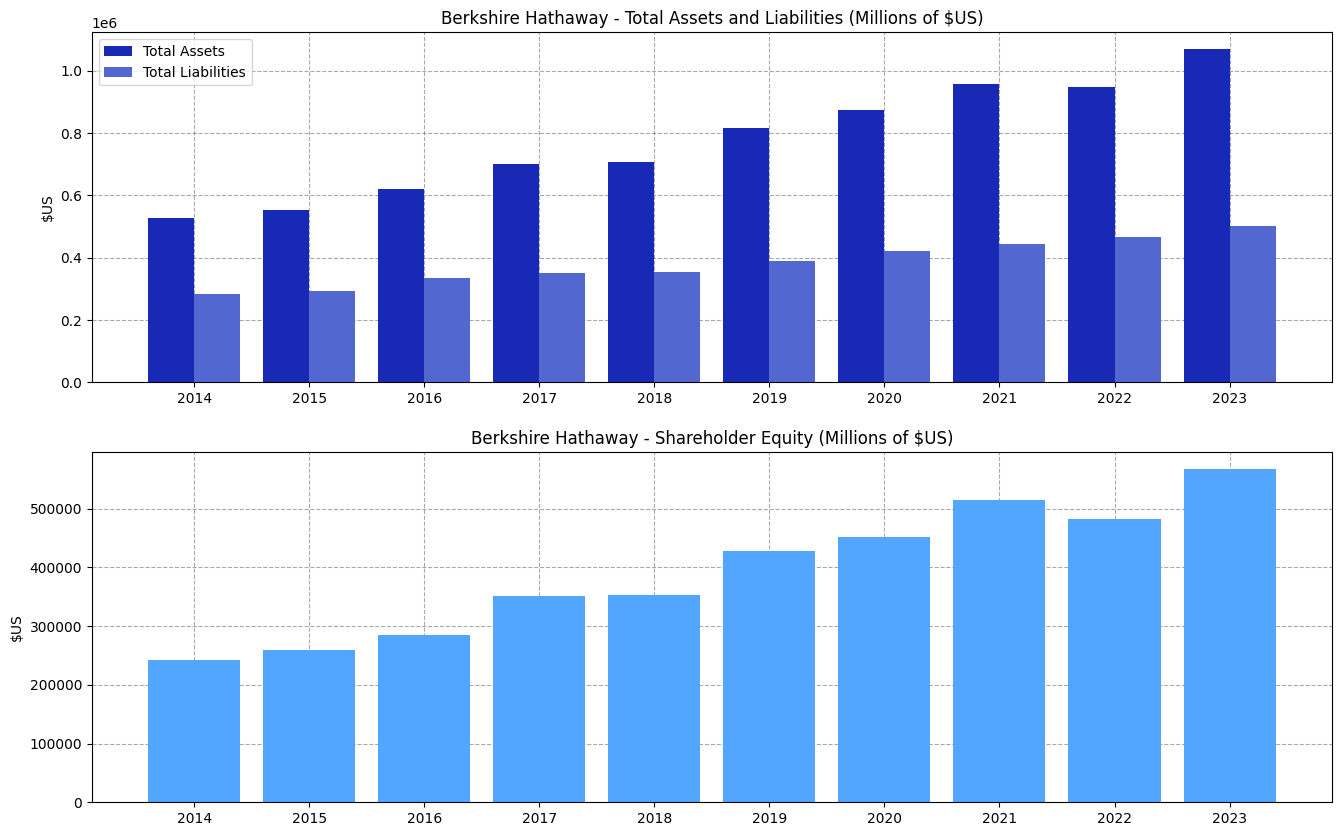

In [8]:
# Select data and calculate shareholder equity
total_assets = balance_sheet_table.loc[14, columns]
total_liabilities = balance_sheet_table.loc[15, columns]
shareholder_equity = total_assets - total_liabilities

# Create a figure to visualize total assets and liabilities with shareholder equity
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,10),dpi=100)

axes[0].bar(columns-0.2,total_assets,width=0.4,color=bar1_color,zorder=2,label='Total Assets')
axes[0].bar(columns+0.2,total_liabilities,width=0.4,color=bar3_color,zorder=2,label='Total Liabilities')
axes[0].set(xticks=columns,ylabel='$US',title=f'{company} - Total Assets and Liabilities (Millions of $US)')
axes[0].legend()

axes[1].bar(columns,shareholder_equity,color=bar2_color,zorder=2)
axes[1].set(xticks=columns,ylabel='$US',title=f'{company} - Shareholder Equity (Millions of $US)')
for ax in axes:
    ax.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}6.jpg',format='jpg',bbox_inches='tight')

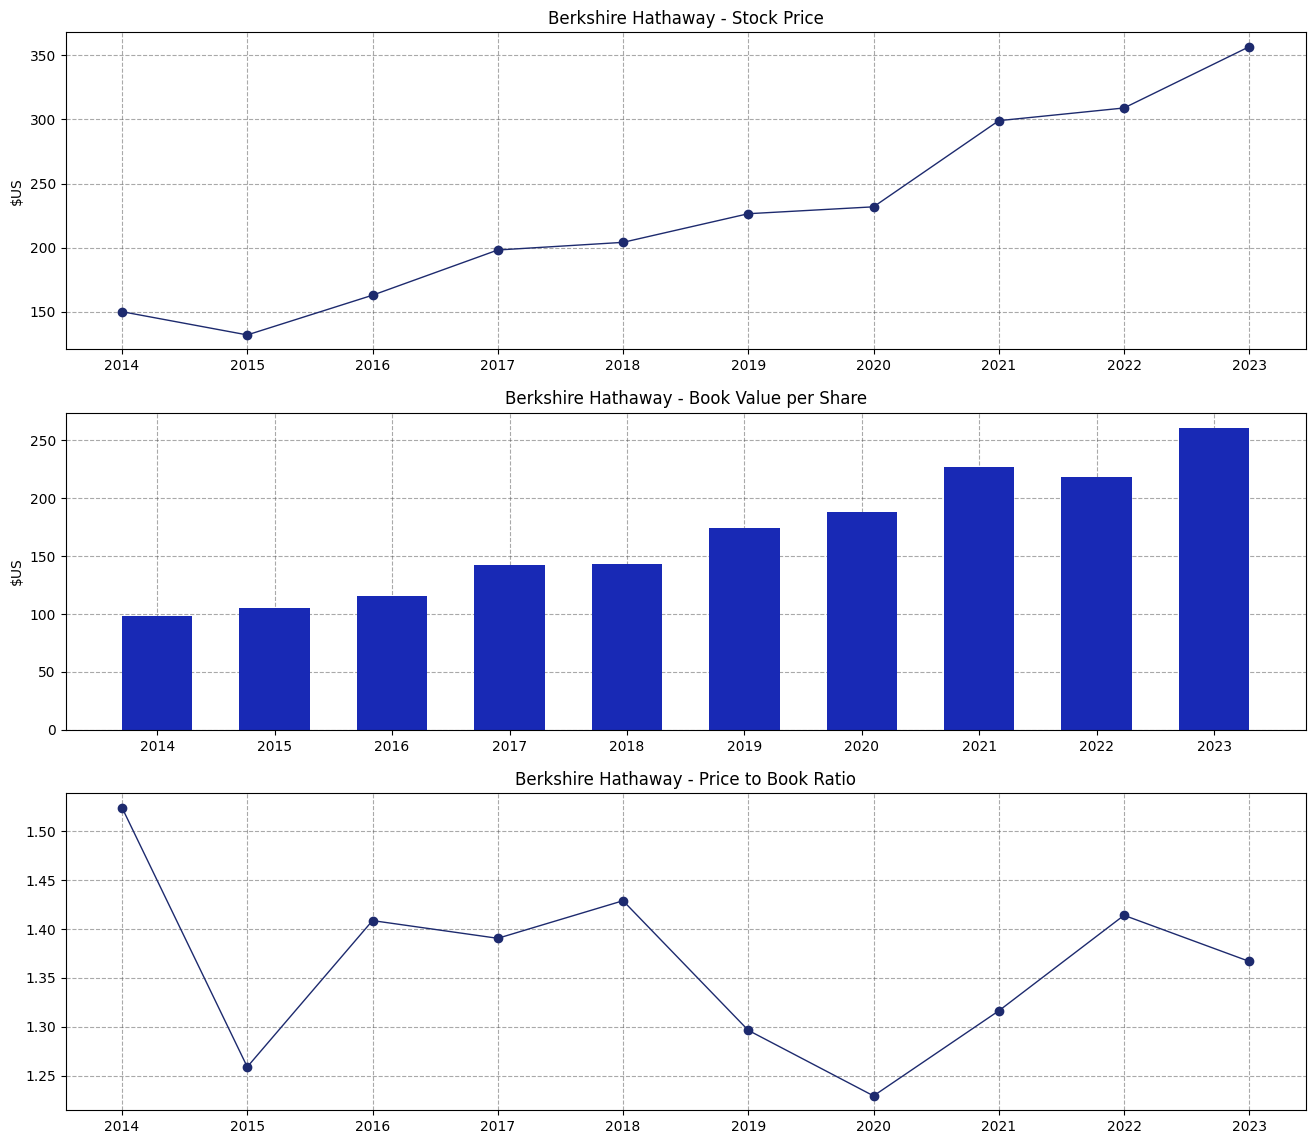

In [9]:
# Create a figure to visualize the price to book ratio
price = income_statement_table.loc[7, columns]
book_value = shareholder_equity/shares
pbs_ratio = price/book_value

fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(16,14),dpi=100)

axes[0].plot(columns,price,color=plot_color,linewidth=1,linestyle='-',marker='o',zorder=2)
axes[0].set(xticks=columns,ylabel='$US',title=f'{company} - Stock Price')
axes[1].bar(columns,book_value,width=0.6,color=bar1_color,zorder=2)
axes[1].set(xticks=columns,ylabel='$US',title=f'{company} - Book Value per Share')
axes[2].plot(columns,pbs_ratio,color=plot_color,linewidth=1,linestyle='-',marker='o',zorder=2)
axes[2].set(xticks=columns,title=f'{company} - Price to Book Ratio')

for ax in axes:
    ax.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}7.jpg',format='jpg',bbox_inches='tight')    

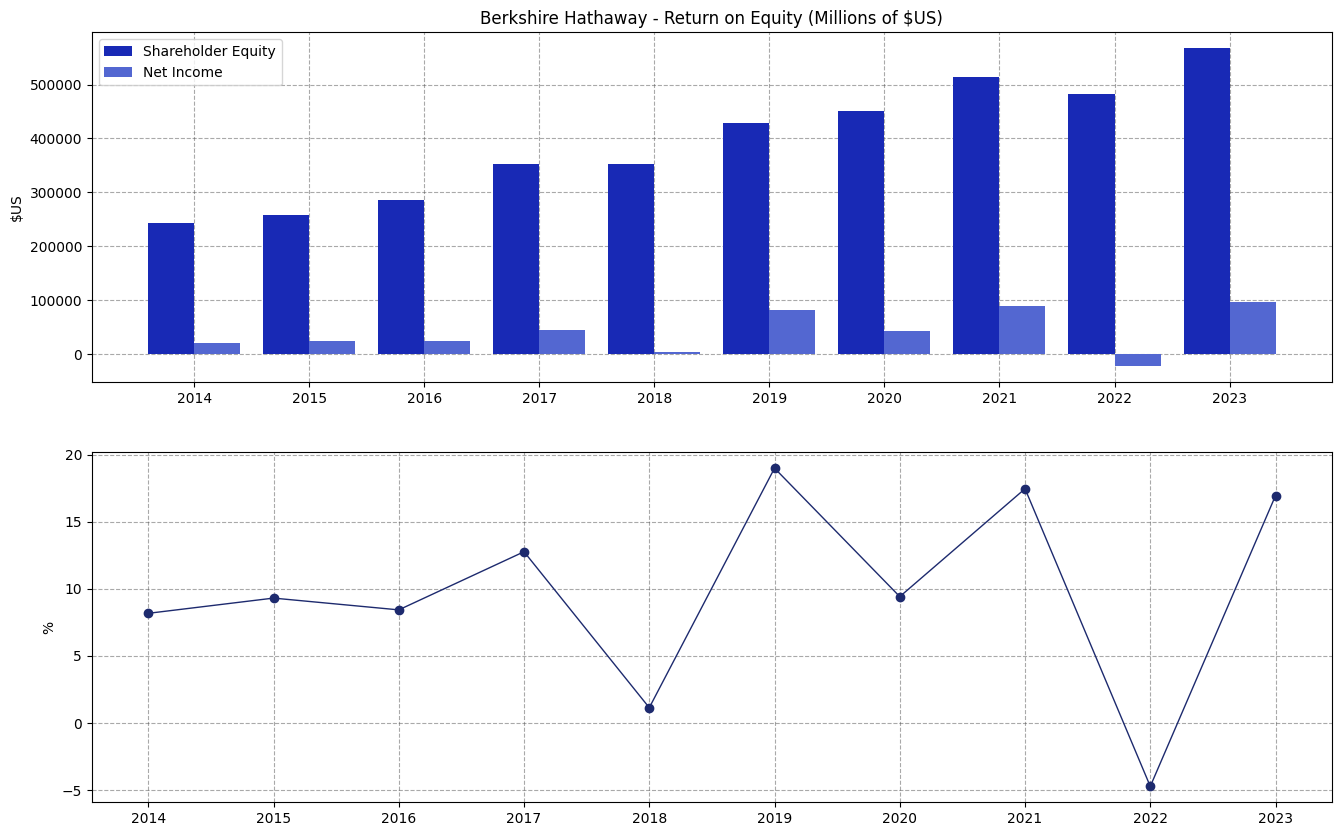

In [10]:
# Create a figure to visualize the return on equity
roe = (net_income/shareholder_equity) * 100

fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(16,10),dpi=100)

axes[0].bar(columns-0.2,shareholder_equity,width=0.4,color=bar1_color,zorder=2,label='Shareholder Equity')
axes[0].bar(columns+0.2,net_income,width=0.4,color=bar3_color,zorder=2,label='Net Income')
axes[0].set(xticks=columns,ylabel='$US',title=f'{company} - Return on Equity (Millions of $US)')
axes[0].legend()

axes[1].plot(columns,roe,color=plot_color,linewidth=1,linestyle='-',marker='o',zorder=2)
axes[1].set(xticks=columns,ylabel='%')
for ax in axes:
    ax.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}8.jpg',format='jpg',bbox_inches='tight')

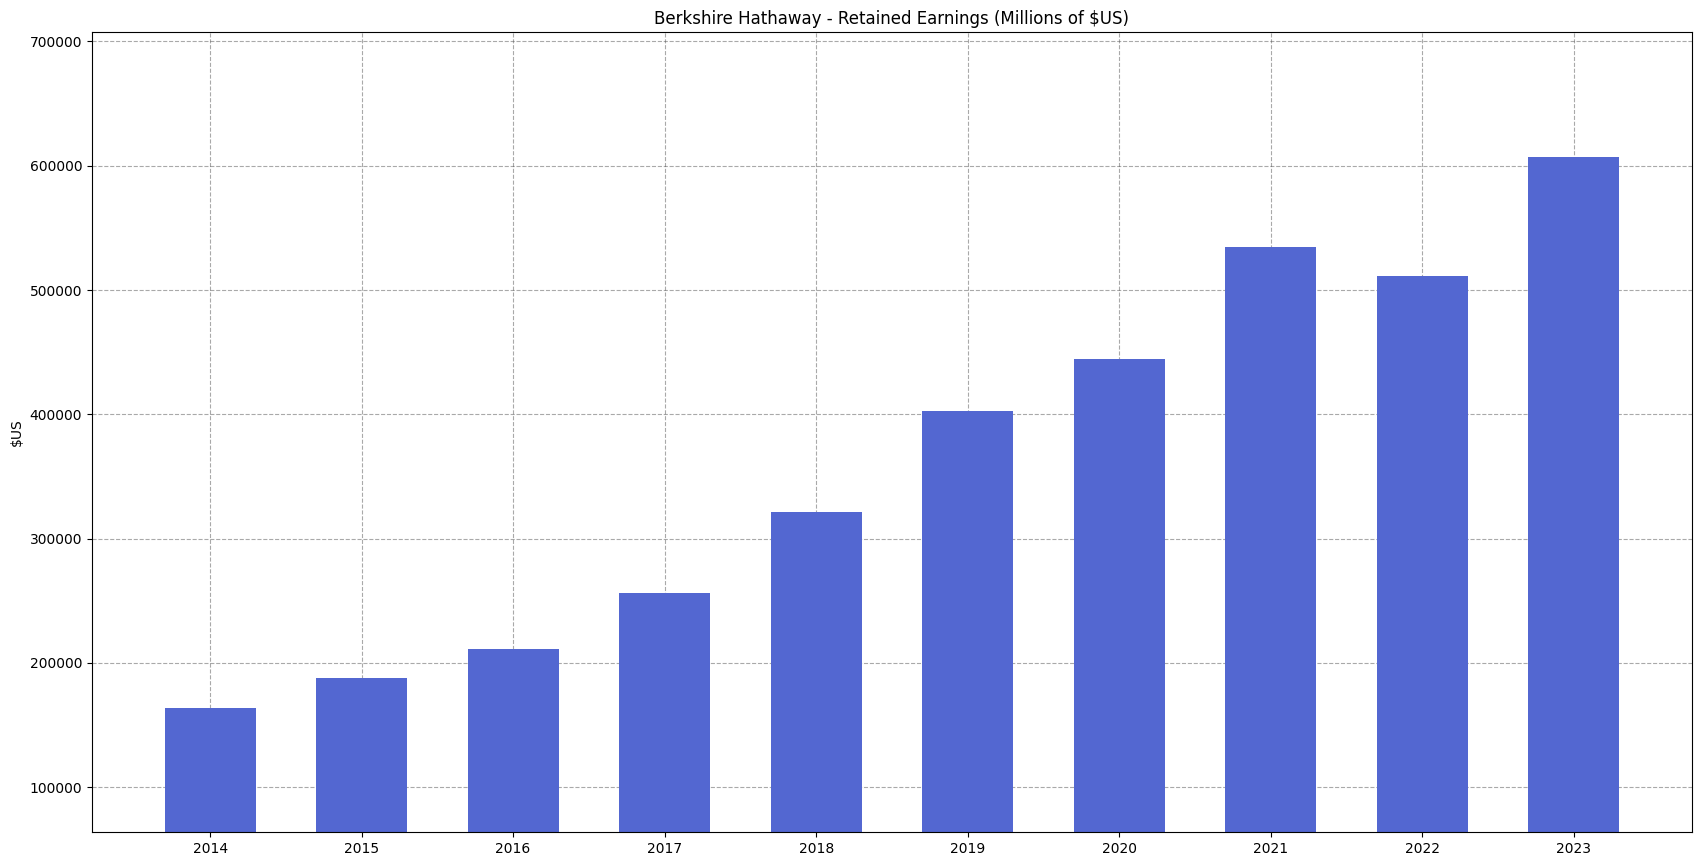

In [11]:
# Create a figure to visualize the retained earnings bar plot
retained_earnings = balance_sheet_table.loc[17,columns]

fig = plt.figure(figsize=(16,8),dpi=100)

axes = fig.add_axes([1,1,1,1])

axes.bar(columns,retained_earnings,width=0.6,color=bar3_color,zorder=2)
axes.set(title=f'{company} - Retained Earnings (Millions of $US)',xticks=columns,ylabel='$US',ylim=(min(retained_earnings)-100000,max(retained_earnings)+100000))
axes.grid(True,color=grid_color,linestyle='--',alpha=0.5,zorder=0)
plt.savefig(f'{file_path}9.jpg',format='jpg',bbox_inches='tight')